## Attempting to Model aleatoric uncertainty of simple dataset using method outlined at;
https://towardsdatascience.com/modeling-uncertainty-in-neural-networks-with-tensorflow-probability-a706c2274d12

In [6]:
# Import libraries
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

tfd = tfp.distributions
tfpl = tfp.layers

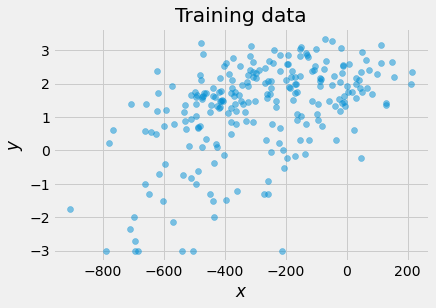

In [2]:
# Read in data
df = pd.read_excel('data.xlsx')
x_train = np.array(df['X'].tolist()).reshape(-1, 1)
y_train = np.array(df['Y'].tolist())

# Plot the data
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, alpha=.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Training data')
plt.show()

In [3]:
# Check no NaN exist
np.sum(x_train), np.sum(y_train)

(-68258.85, 299.31907046688195)

In [4]:
# Define neg. loglik. loss function
def neg_loglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [7]:
# Let's build a model with probabilistic output (mean & std) - a simpler way
event_shape = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=tfpl.IndependentNormal.params_size(event_shape), input_shape=(1,)),
    tfpl.IndependentNormal(event_shape=event_shape)
])

# Compile 
model.compile(loss=neg_loglik, optimizer='sgd')

# Fit
model.fit(x_train, y_train, epochs=500, verbose=0)

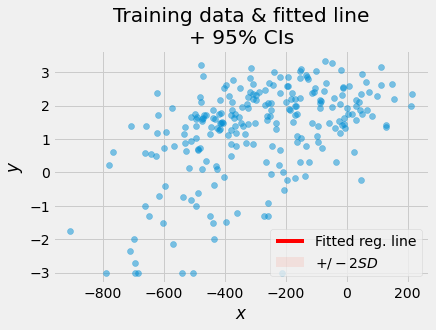

In [8]:
# Get predictions - E[Y|X]
y_hat = model(x_train).mean()

# Get SD
y_sd = model(x_train).stddev()

# Compute conf ints
y_hat_lower = y_hat - 2 * y_sd
y_hat_upper = y_hat + 2 * y_sd

# Plot data, predicted line and ~95% conf ints
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, alpha=.5)
plt.plot(x_train, y_hat, label='Fitted reg. line', c='r')
plt.fill_between(np.squeeze(x_train), np.squeeze(y_hat_lower), np.squeeze(y_hat_upper), alpha=.1, label='$+/- 2SD$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Training data & fitted line\n+ 95% CIs')
plt.legend()
plt.show()

In [9]:
y_hat

<tf.Tensor: shape=(237, 1), dtype=float32, numpy=
array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]